In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from LogisticRegression import LogisticRegression

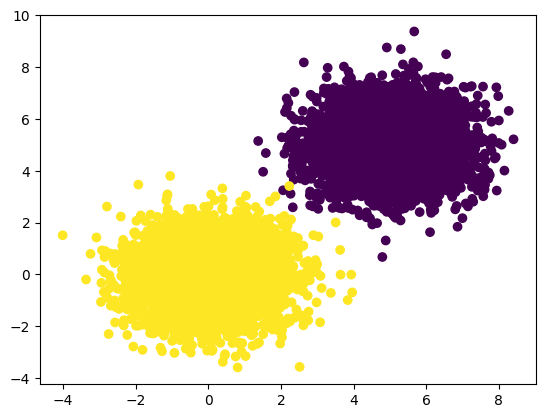

In [10]:
X = np.random.randn(10000,2)
y = np.ones(10000) 

y[:5000] *= -1
X[:5000] += 5

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Final weights:  [-1.53481423 -1.6343806 ]
Final bias:  7.499344651743965
Final loss:  0.004572775401287146


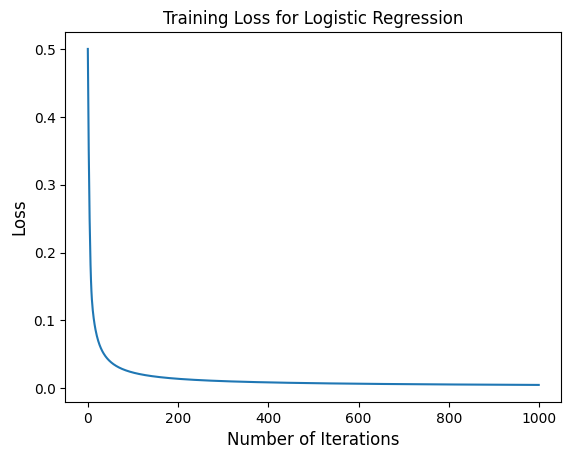

In [11]:
model = LogisticRegression(alpha=1e-4, max_iter=1000)
w,b,loss = model.fit(X, y)

print("Final weights: ", w)
print("Final bias: ", b)
print("Final loss: ", loss[-1])

plt.figure()
plt.title("Training Loss for Logistic Regression")
plt.xlabel("Number of Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(loss)
plt.show()

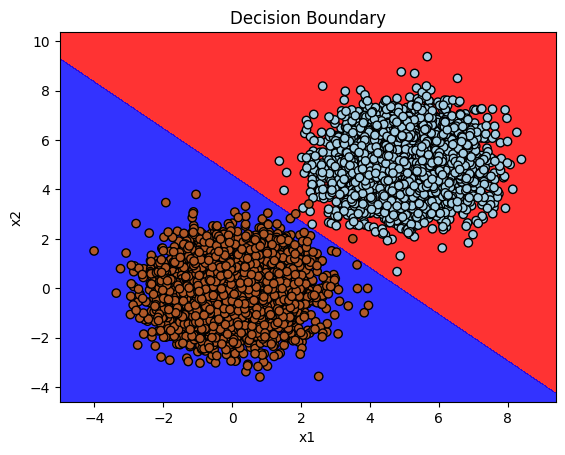

In [13]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Calculate the decision boundary
Z = w[0] * xx + w[1] * yy + b
Z = np.sign(Z)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'], linestyles=['--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [23]:
preds = model.predict(X)
preds = np.where(preds > 0.5, 1, -1)
missclassified = np.where(preds != y)[0]
missclassified_points = X[missclassified]

missclassified_points

array([[3.50534873, 2.00377359],
       [2.22978998, 3.40944149],
       [1.84754251, 3.01038396]])

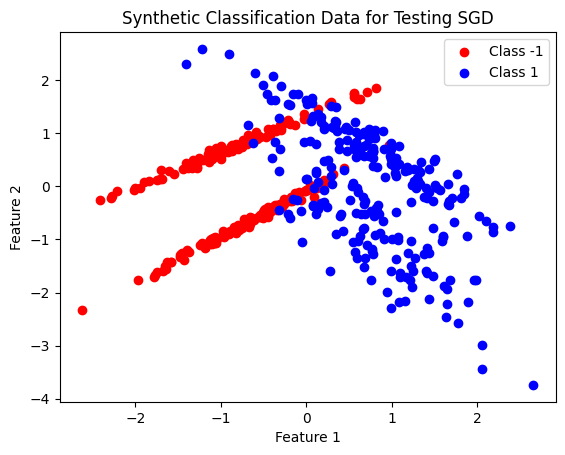

In [5]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)

y = 2 * y - 1  

scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Synthetic Classification Data for Testing SGD")
plt.show()


Final weights (SGD):  [3.8983769 0.2271856]
Final bias (SGD):  0.1728246941034054
Final loss (SGD):  0.2823535205026105


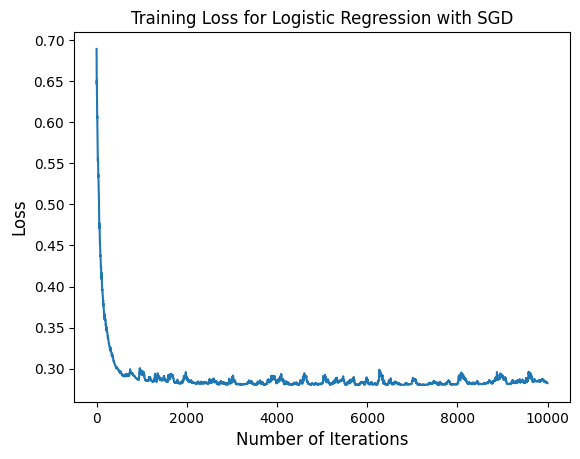

In [7]:
model_sgd = LogisticRegression(alpha=.047, max_iter=10000, SGD=True)

w_sgd, b_sgd, loss_sgd = model_sgd.fit(X, y)

print("Final weights (SGD): ", w_sgd)
print("Final bias (SGD): ", b_sgd)
print("Final loss (SGD): ", loss_sgd[-1])

plt.figure()
plt.title("Training Loss for Logistic Regression with SGD")
plt.xlabel("Number of Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.plot(loss_sgd)
plt.show()

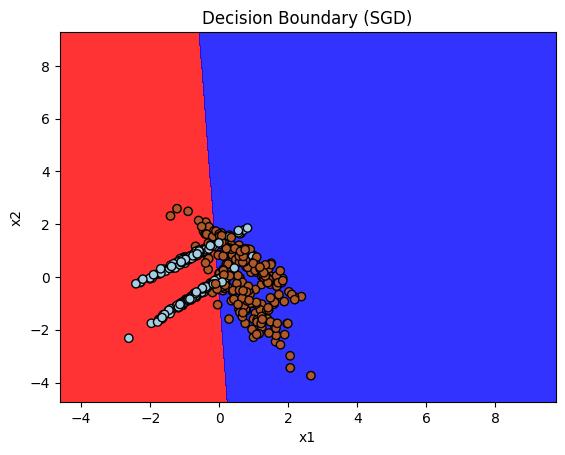

In [9]:
Z_sgd = w_sgd[0] * xx + w_sgd[1] * yy + b_sgd
Z_sgd = np.sign(Z_sgd)

plt.contourf(xx, yy, Z_sgd, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'], linestyles=['--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary (SGD)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()